In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("../data/broadband_training_2.csv")
data = data.set_index('tract_geoid')
data = data.loc[:,data.dtypes =='float64']
data=data.dropna(how='any', axis = 1)
data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
tract_geoid,,,,,,,,,,,,,,,,,,,,,
24031700607,987.0,880.0,3.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,7.475754,6.384698,3.852371,2.693966,0.431034,0.080819,3.811961,1.997428,132.108002,88.997002
37005950200,1000.0,500.0,3.0,2.0,4.0,1.0,1.0,1.0,2.0,0.0,...,9.862571,5.524117,6.467259,6.898410,3.826462,2.425222,17.921645,1.986085,36.334999,34.022999
20027458200,1000.0,1000.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,0.0,...,10.346399,6.654512,5.423883,3.418414,3.828624,5.332726,19.925599,1.308642,67.499001,48.374001
48091310801,1000.0,1000.0,10.0,3.0,9.0,5.0,3.0,4.0,2.0,0.0,...,11.537878,9.154395,5.768939,2.565660,1.487779,0.743889,15.986602,1.401302,121.716003,18.773001
37021002203,1000.0,1000.0,9.0,2.0,5.0,3.0,1.0,2.0,2.0,0.0,...,2.844886,5.983292,2.528788,3.748024,2.370738,2.912621,17.295100,0.977480,41.883999,10.521000


In [4]:
test_data = pd.read_csv("../data/broadband_test_2.csv")
test_data = test_data.set_index('tract_geoid')
test_data = test_data.loc[:,data.columns]
test_data=test_data.dropna(how='any', axis = 1)
test_data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
tract_geoid,,,,,,,,,,,,,,,,,,,,,
17097860906,1000.0,1000.0,3.0,2.0,5.0,3.0,1.0,2.0,2.0,0.0,...,3.898676,3.846555,2.981341,2.752007,0.323152,0.416971,6.047290,1.263061,118.959999,11.917000
24021751600,987.0,35.0,2.0,3.0,6.0,2.0,3.0,1.0,2.0,0.0,...,7.145209,7.145209,3.720777,2.271979,2.041488,3.424432,15.278235,2.872629,15.215000,5.194000
36087013100,1000.0,1000.0,8.0,0.0,5.0,3.0,0.0,3.0,2.0,0.0,...,8.178792,9.082263,4.707561,5.119670,1.410683,4.041845,16.362192,0.586420,103.932999,36.136002
19061010201,1000.0,940.0,11.0,4.0,8.0,4.0,2.0,4.0,2.0,0.0,...,7.954194,4.688951,3.884246,2.445063,0.324977,0.402352,5.804954,2.057745,57.477001,32.389000
36101960800,1000.0,50.0,5.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,6.267628,4.387339,4.638045,1.848950,2.601065,2.977123,18.617542,3.083404,89.845001,22.826000


In [5]:
y_variables = ['employment_rate']
x_variables = ['All_Provider_Count_100',
               'Wired_Provider_Count',
               'All_Provider_Count_25', 
               'median_income', 'MaxAdUp',
                'pct_internet_broadband_any_type',
              'pct_computer_with_broadband']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
regressor = XGBRegressor(n_estimators = 100)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.986541073286354
Mean Squared Error: 64.84584196777924
Root Mean Squared Error: 8.052691597706895


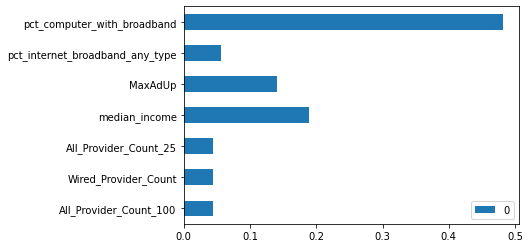

In [10]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()

In [17]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
regressor_tuned = XGBRegressor()
regress = GridSearchCV(estimator=regressor_tuned, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
regress.fit(X_train, y_train)
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}
Lowest RMSE:  8.036384213275742
Mean Absolute Error: 5.986541073286354
Mean Squared Error: 64.84584196777924
Root Mean Squared Error: 8.052691597706895
